## Title :
Image Occlusion

## Description :
The aim of this exercise is to understand occlusion. Each pixel in an image has varying importance for the classification of the image. Occlusion involves running a patch over the entire image to see which pixels affect the classification the most.

<img src="../fig/fig2.png" style="width: 500px;">

## Instructions:

- Define a convolutional neural network based on the architecture mentioned in the scaffold.
- Load the trained model weights given in the `occlusion_model_weights.h5` file.
- Take a quick look at the model architecture using `model.summary()`.
- Use the helper function `occlusion` to visualize the delta loss as a mask moves across the image. The output will look similar to the one shown below.

<img src="../fig/fig3.png" style="width: 500px;">

## Hints:

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D" target="_blank">MaxPooling2D()</a>Max pooling operation for 2D spatial data.

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile" target="_blank">compile()</a>Configures the model for training.

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D" target="_blank">Conv2D()</a>2D convolution layer (e.g. spatial convolution over images).

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten" target="_blank">flatten()</a>Flattens the input. 

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense" target="_blank">Dense()</a>A regular densely-connected NN layer.

**NOTE** - To run the test, comment the cells that call the occlusion function and then click on **Mark**.

In [1]:
# Import necessary libraries
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from sklearn.metrics import accuracy_score
from helper import occlusion, load_dataset
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNet
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Input, Conv2D, MaxPooling2D, InputLayer, ReLU

%matplotlib inline

2023-07-20 15:06:01.290625: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Initialize a sequential model
model = Sequential(name="Occlusion")

# First convolution layer
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))

# Second convolution layer
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# First max-pooling layer
model.add(MaxPooling2D((2, 2)))

# Third convolution layer
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Fourth convolution layer
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Second max-pooling layer
model.add(MaxPooling2D((2, 2)))

# Fifth convolution layer
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Sixth convolution layer
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Third max-pooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected dense layer
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compiling the model
model.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


2023-07-20 15:06:59.130814: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [3]:
# Take a quick look at the model summary
model.summary()

Model: "Occlusion"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                     

In [4]:
# Load the weights of the pre-trained model
model.load_weights("occlusion_model_weights.h5")

### ⏸ Call the function `occlusion` (below) with image numbers 10, 12 and 35. What do you observe based on the occlusion map plotted for each image?

#### A. The images are blurred more as compared to other images in the set.
#### B. The images are incorrectly predicted because the model weights the wrong parts of the image to make the prediction.
#### C. The images are correctly predicted as the network is giving high importance to the most telling features of the images.

In [ ]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option C, put 'C')
answer1 = '___'

(50, 3)
Found 50 validated image filenames belonging to 10 classes.
1/1 [==============================] - 0s 97ms/step


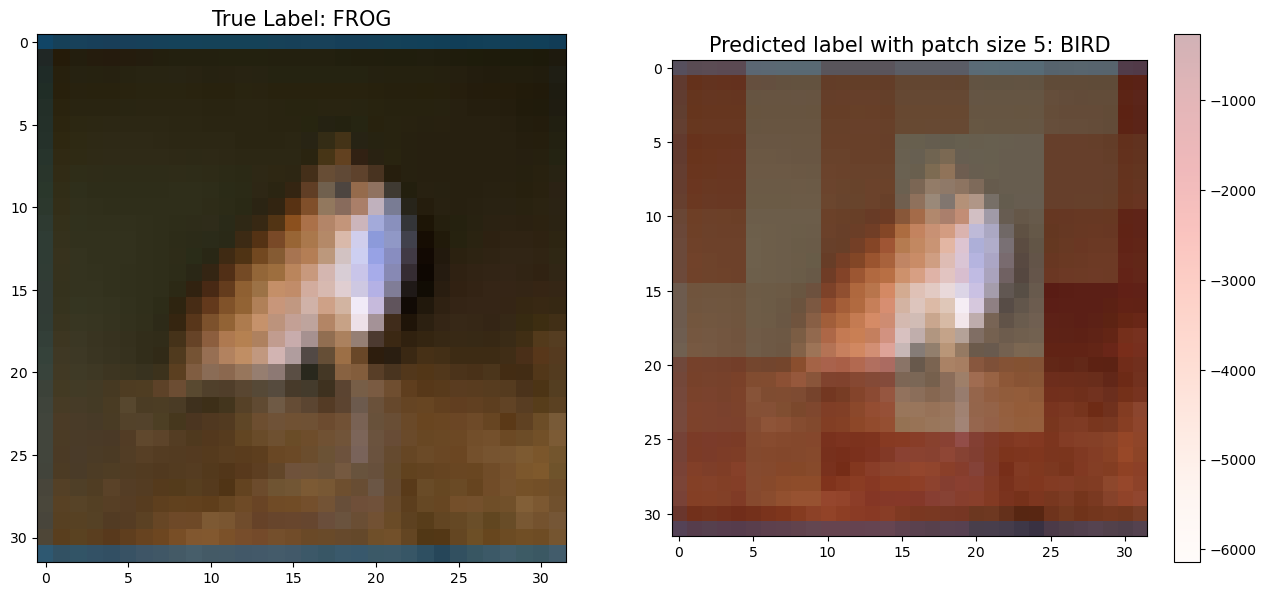

<Figure size 800x600 with 0 Axes>

In [37]:
# Call the helper function occlusion with 
# the trained model, a valid image number within 50, occlusion 
# patch size
img_num = 10
patch_size = 5

occlusion(model, img_num , patch_size)

(50, 3)
Found 50 validated image filenames belonging to 10 classes.
1/1 [==============================] - 0s 50ms/step


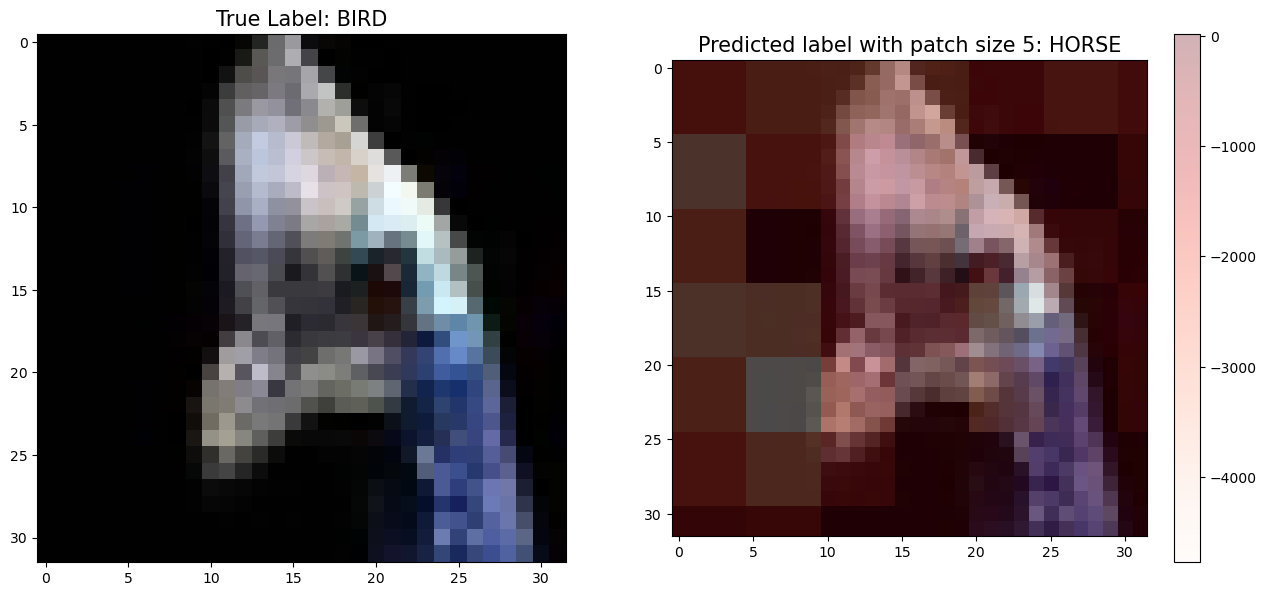

<Figure size 800x600 with 0 Axes>

In [38]:
img_num = 12
patch_size = 5

occlusion(model, img_num , patch_size)

(50, 3)
Found 50 validated image filenames belonging to 10 classes.
1/1 [==============================] - 0s 30ms/step


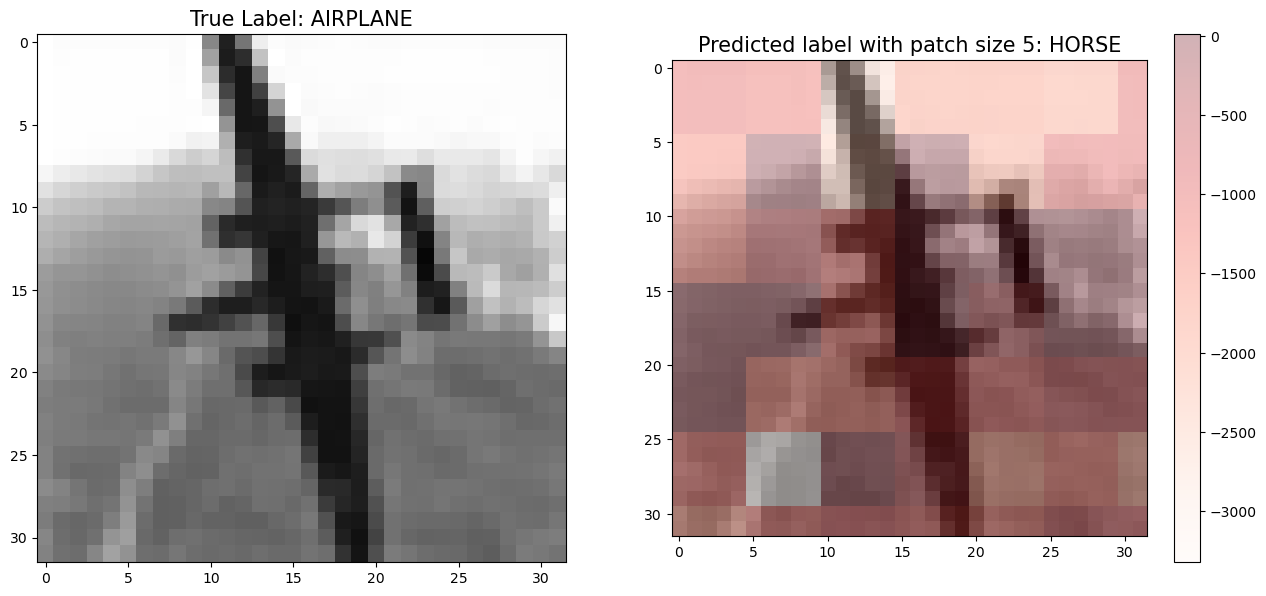

<Figure size 800x600 with 0 Axes>

In [39]:
img_num = 35
patch_size = 5

occlusion(model, img_num , patch_size)

### ⏸ Call the `occlusion` function (below) with images 1, 15 and 30. What do you observe based on the plots?

In [ ]:
### edTest(test_chow2) ###

# Type your answer here 
answer2 = '___'

(50, 3)
Found 50 validated image filenames belonging to 10 classes.
1/1 [==============================] - 0s 21ms/step


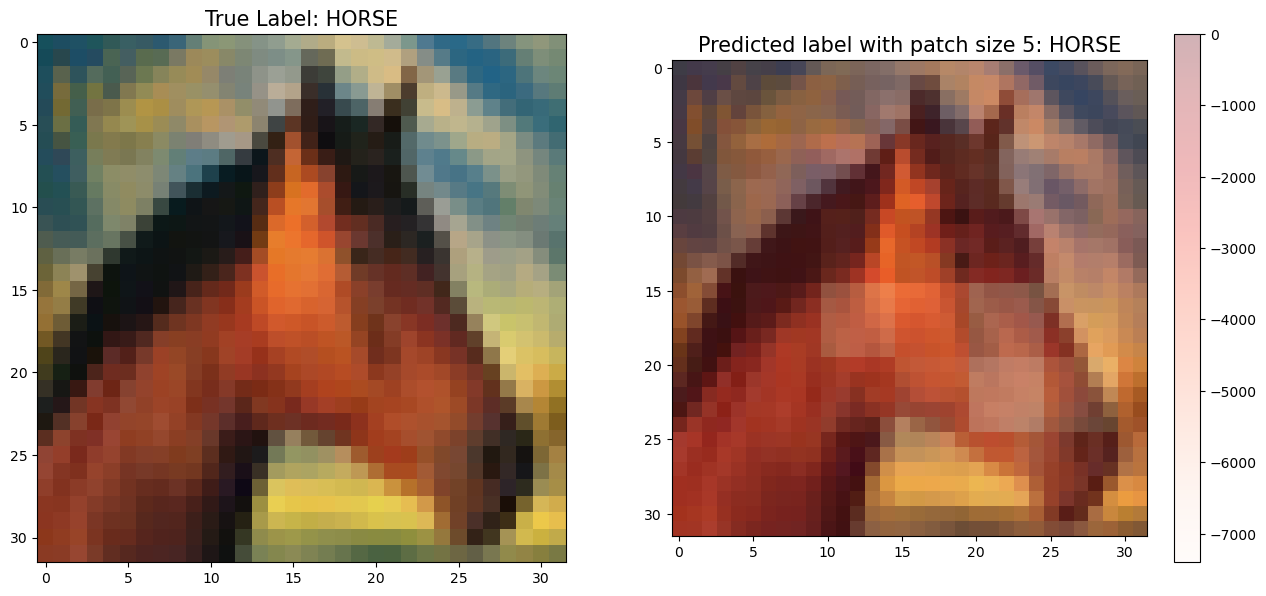

<Figure size 800x600 with 0 Axes>

In [40]:
img_num = 1
patch_size = 5

occlusion(model, img_num , patch_size)

(50, 3)
Found 50 validated image filenames belonging to 10 classes.
1/1 [==============================] - 0s 36ms/step


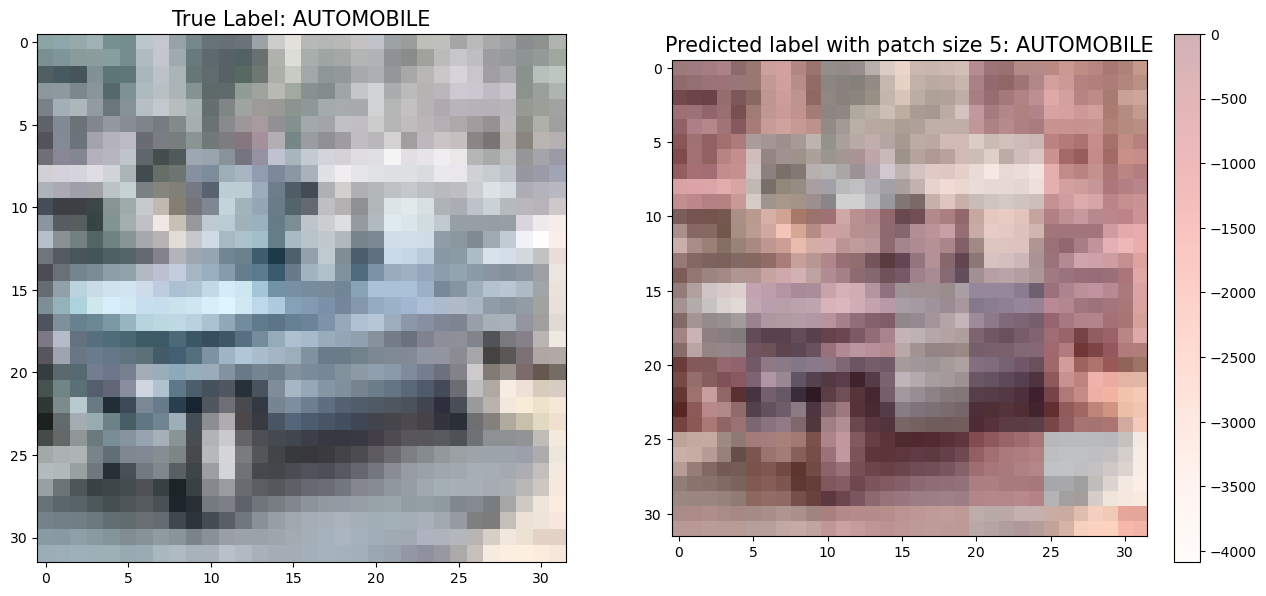

<Figure size 800x600 with 0 Axes>

In [41]:
img_num = 15
patch_size = 5

occlusion(model, img_num , patch_size)

(50, 3)
Found 50 validated image filenames belonging to 10 classes.
1/1 [==============================] - 0s 43ms/step


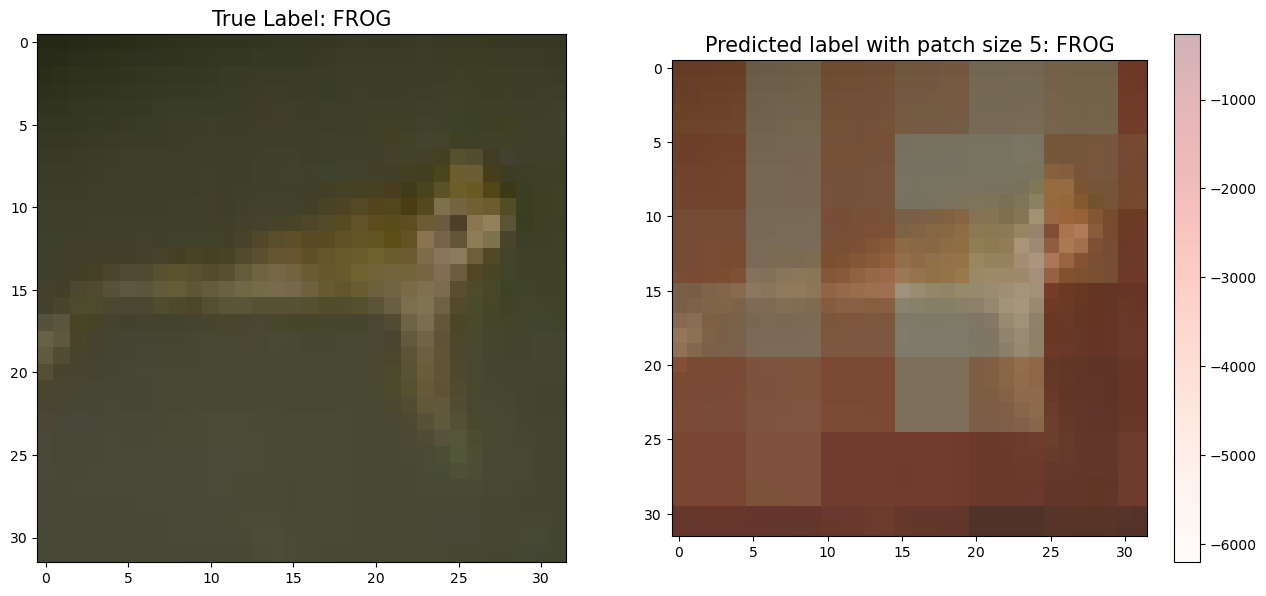

<Figure size 800x600 with 0 Axes>

In [42]:
img_num = 30
patch_size = 5

occlusion(model, img_num , patch_size)

In [29]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNet
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.nn import sparse_softmax_cross_entropy_with_logits
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import preprocess_input



def load_dataset():
	df = pd.read_csv("../data/cifar.csv")
	print(df.shape)
	generator = ImageDataGenerator(rescale=1. / 255)

	data_gen = generator.flow_from_dataframe(
		df, directory=None, x_col='image', y_col='label',
		target_size=(32, 32), color_mode='rgb', seed=30,
		class_mode='categorical', batch_size=50, shuffle=False,
		save_format='png', subset='training')
	# Subset of data ("training" or "validation") if validation_split is set in ImageDataGenerator. 

	return data_gen, df


In [31]:
data_gen, df = load_dataset()

(50, 3)
Found 50 validated image filenames belonging to 10 classes.


In [36]:
data_gen[0]

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.854902  , 0.8431373 , 0.8745099 ],
          [0.7411765 , 0.73333335, 0.77647066],
          [0.97647065, 0.9803922 , 0.9803922 ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.62352943, 0.6117647 , 0.65882355],
          [0.4431373 , 0.43529415, 0.48235297],
          [0.91372555, 0.9176471 , 0.92549026]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.47450984, 0.4666667 , 0.5137255 ],
          [0.3921569 , 0.38431376, 0.43137258],
          [0.8470589 , 0.8431373 , 0.8588236 ]],
 
         ...,
 
         [[0.98823535, 0.9843138 , 0.98823535],
          [0.76470